🧠 WHY VISUALIZATION MATTERS

Numbers in a table are hard to read. A chart makes patterns immediately obvious. When you show a recruiter or internship mentor a chart instead of a printed DataFrame, you look like a data scientist — not a student running code.
Visualization also helps YOU understand your data faster during EDA.

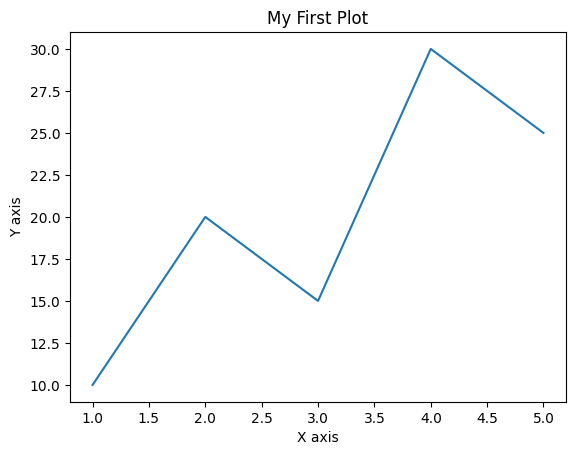

In [3]:
import matplotlib.pyplot as plt

# Most basic plot
x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 30, 25]

plt.plot(x, y)
plt.title("My First Plot")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

plt.show() renders and displays the chart. Always call it at the end.

The standard import is always import matplotlib.pyplot as plt — that plt alias is universal, everyone uses it.

🧠 TOPIC 2 — Line Plot

Used for showing trends over time or continuous data

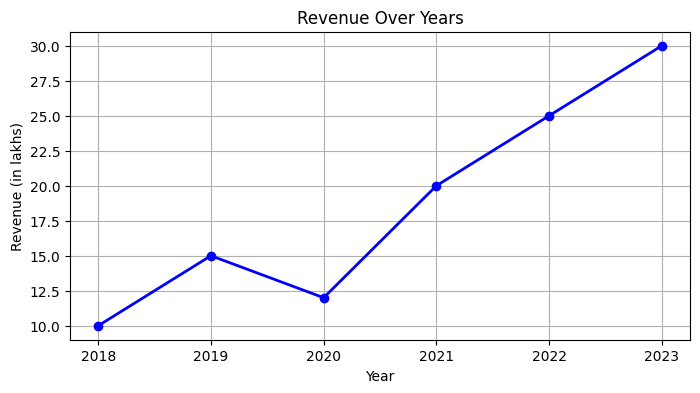

In [4]:
import matplotlib.pyplot as plt

years = [2018, 2019, 2020, 2021, 2022, 2023]
revenue = [10, 15, 12, 20, 25, 30]

plt.figure(figsize=(8, 4))        # set chart size — width, height in inches
plt.plot(years, revenue, color="blue", linewidth=2, marker="o")
plt.title("Revenue Over Years")
plt.xlabel("Year")
plt.ylabel("Revenue (in lakhs)")
plt.grid(True)                    # adds background grid — easier to read
plt.show()

marker="o" puts a dot at each data point. grid(True) adds the background lines. figsize controls the size of the chart.

🧠 TOPIC 3 — Bar Chart
* Used for comparing categories:

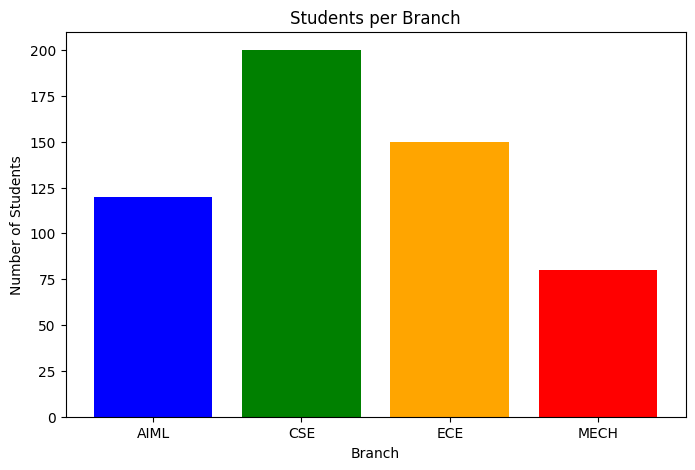

In [5]:
branches = ["AIML", "CSE", "ECE", "MECH"]
students = [120, 200, 150, 80]

plt.figure(figsize=(8, 5))
plt.bar(branches, students, color=["blue", "green", "orange", "red"])
plt.title("Students per Branch")
plt.xlabel("Branch")
plt.ylabel("Number of Students")
plt.show()

Horizontal bar chart — useful when category names are long:

<BarContainer object of 4 artists>

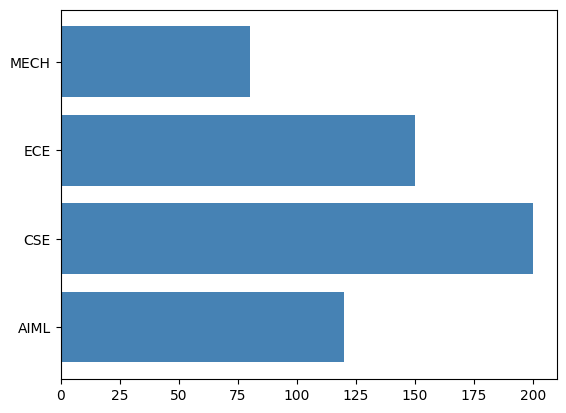

In [6]:
plt.barh(branches, students, color="steelblue")   # barh = horizontal

🧠 TOPIC 4 — Histogram

Used for showing distribution of a single numeric column — how values are spread:

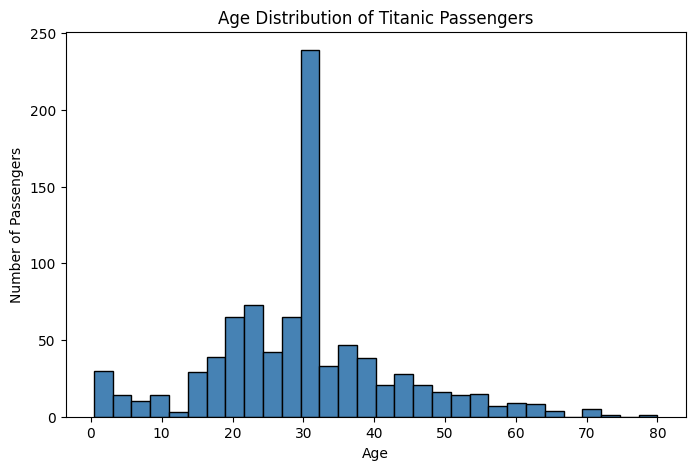

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=30, color="steelblue", edgecolor="black")
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

bins=20 means divide the data into 20 buckets. More bins = more detail. Fewer bins = smoother picture. Always experiment with bins.

🧠 TOPIC 5 — Scatter Plot

Used for showing relationship between two numeric columns:

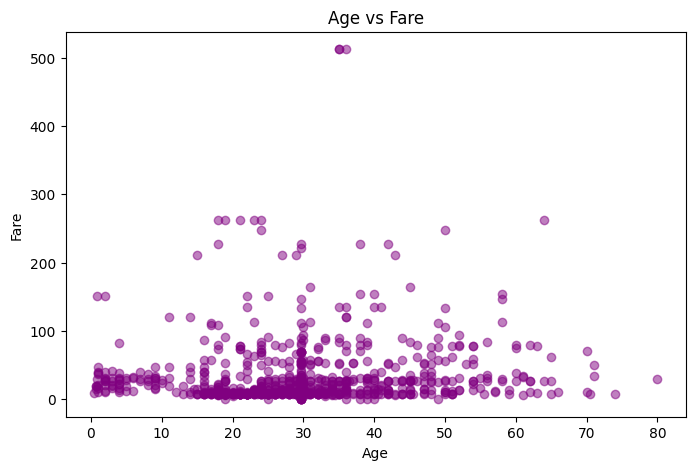

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Age"], df["Fare"], alpha=0.5, color="purple")
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

alpha=0.5 makes points semi-transparent — important when points overlap, so you can see density. Values go from 0 (invisible) to 1 (fully solid).

🧠 TOPIC 6 — Pie Chart

Used for showing proportions:

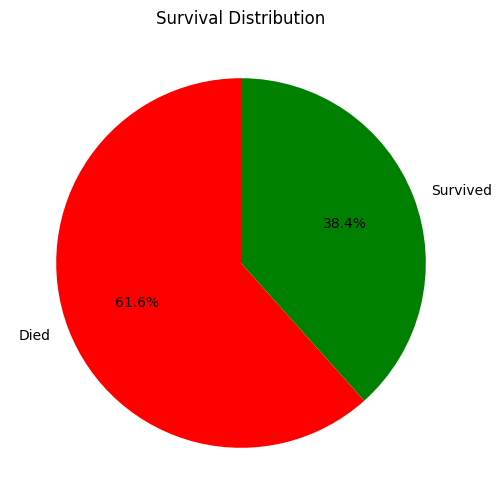

In [9]:
survived_counts = df["Survived"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    survived_counts,
    labels=["Died", "Survived"],
    autopct="%1.1f%%",            # shows percentage on each slice
    colors=["red", "green"],
    startangle=90
)
plt.title("Survival Distribution")
plt.show()

🧠 TOPIC 7 — Subplots

Real EDA reports show multiple charts together:

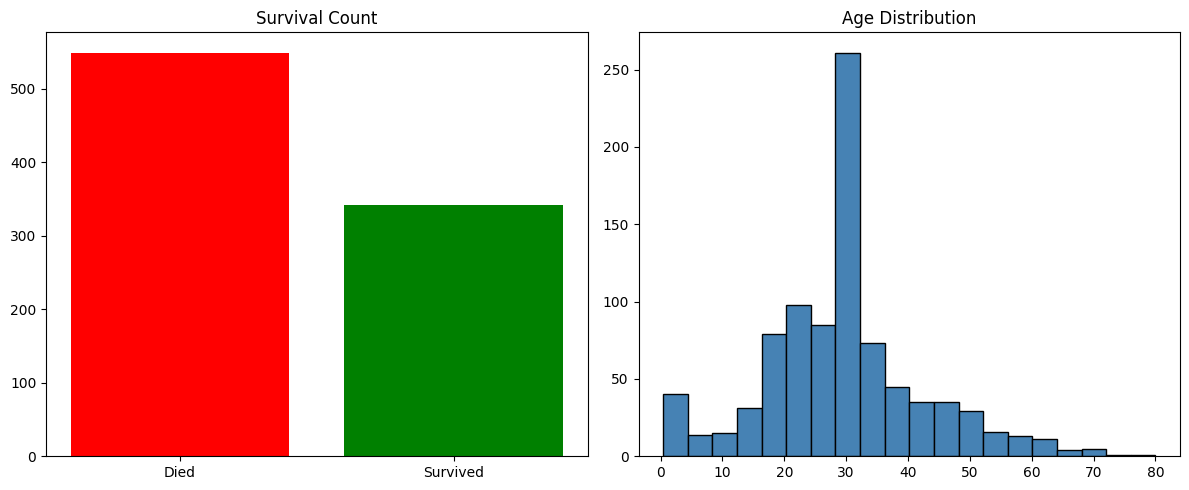

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))   # 1 row, 2 columns of charts

# First chart
axes[0].bar(["Died", "Survived"], df["Survived"].value_counts(), color=["red", "green"])
axes[0].set_title("Survival Count")

# Second chart
axes[1].hist(df["Age"], bins=20, color="steelblue", edgecolor="black")
axes[1].set_title("Age Distribution")

plt.tight_layout()    # prevents charts from overlapping
plt.show()

subplots(rows, cols) creates a grid of charts. axes[0] is first chart, axes[1] is second. Notice with subplots you use axes[i].set_title() instead of plt.title().

fig is the whole figure — the outer frame containing everything.
axes is a list of individual chart slots. axes[0] is the first slot, axes[1] is the second.

For 4 charts — subplots(2, 2) gives you a 2x2 grid. But now axes is a 2D list, so you access charts like a matrix

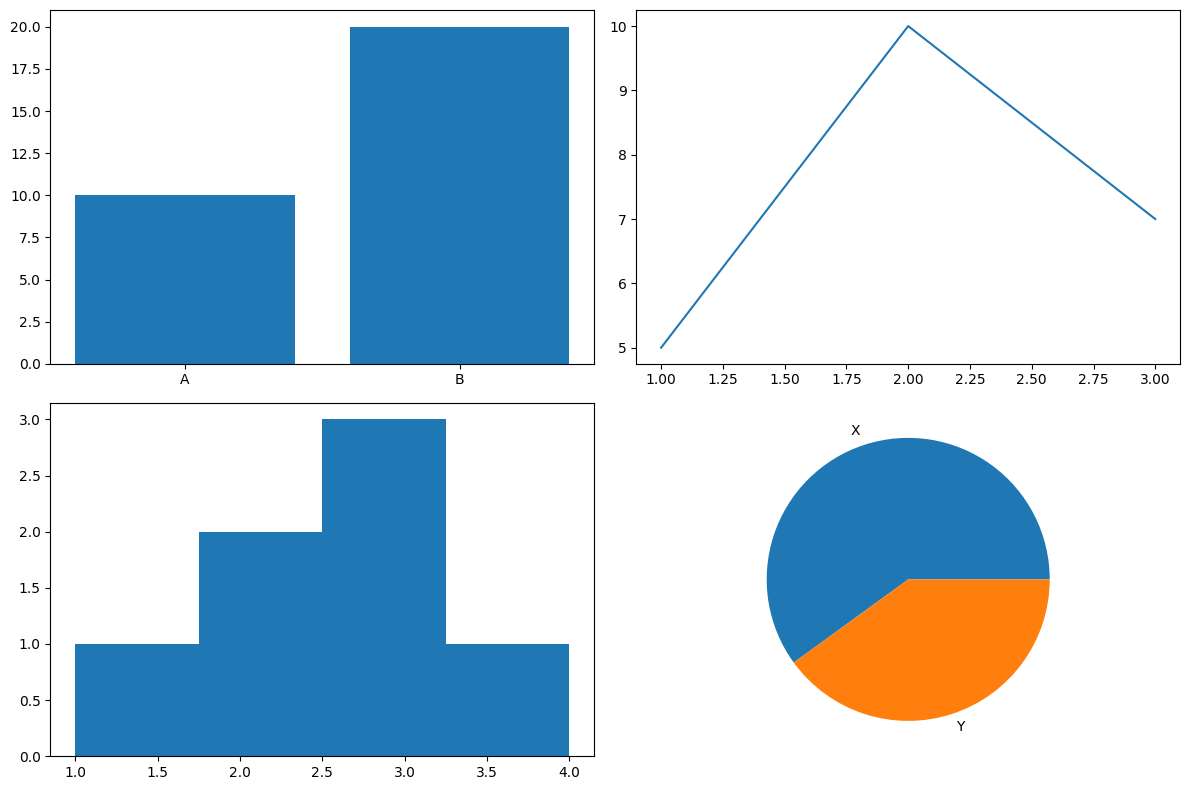

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0][0].bar(["A", "B"], [10, 20])      # top left
axes[0][1].plot([1, 2, 3], [5, 10, 7])    # top right
axes[1][0].hist([1,2,2,3,3,3,4], bins=4)  # bottom left
axes[1][1].pie([60, 40], labels=["X","Y"]) # bottom right

plt.tight_layout()
plt.show()

#Think of it exactly like a 2D array — `axes[row][column]`.
#For 6 charts — `subplots(2, 3)`:
#axes[0][0]  axes[0][1]  axes[0][2]
#axes[1][0]  axes[1][1]  axes[1][2]


For 3 charts — subplots(1, 3) — single row, so axes stays 1D:

axes[0]   axes[1]   axes[2]

The rule:

1 row of charts → axes[i] — simple list
Multiple rows → axes[i][j] — row first, column second

Task 1 — Basic Charts (20 mins)

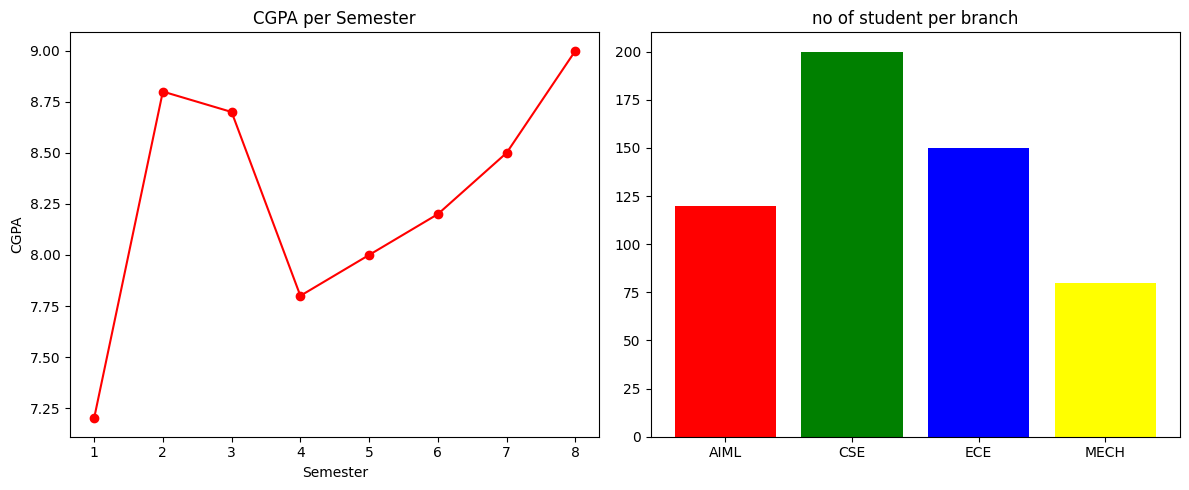

In [ ]:
x=[1, 2, 3, 4, 5, 6, 7, 8]
y=[7.2, 8.8, 8.7, 7.8, 8, 8.2, 8.5, 9]
branches = ["AIML", "CSE", "ECE", "MECH"]
students = [120, 200, 150, 80]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))   # 1 row, 2 columns of charts

# first chart  
axes[0].plot(x, y, color="red", marker="o")
axes[0].set_title("CGPA per Semester")
axes[0].set_xlabel("Semester")
axes[0].set_ylabel("CGPA")

# second chart
axes[1].bar(branches, students, color=["red", "green","blue","yellow"])
axes[1].set_title("no of student per branch")

plt.tight_layout()    # prevents charts from overlapping
plt.show()

Task 2 — Titanic Visualization (40 mins)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


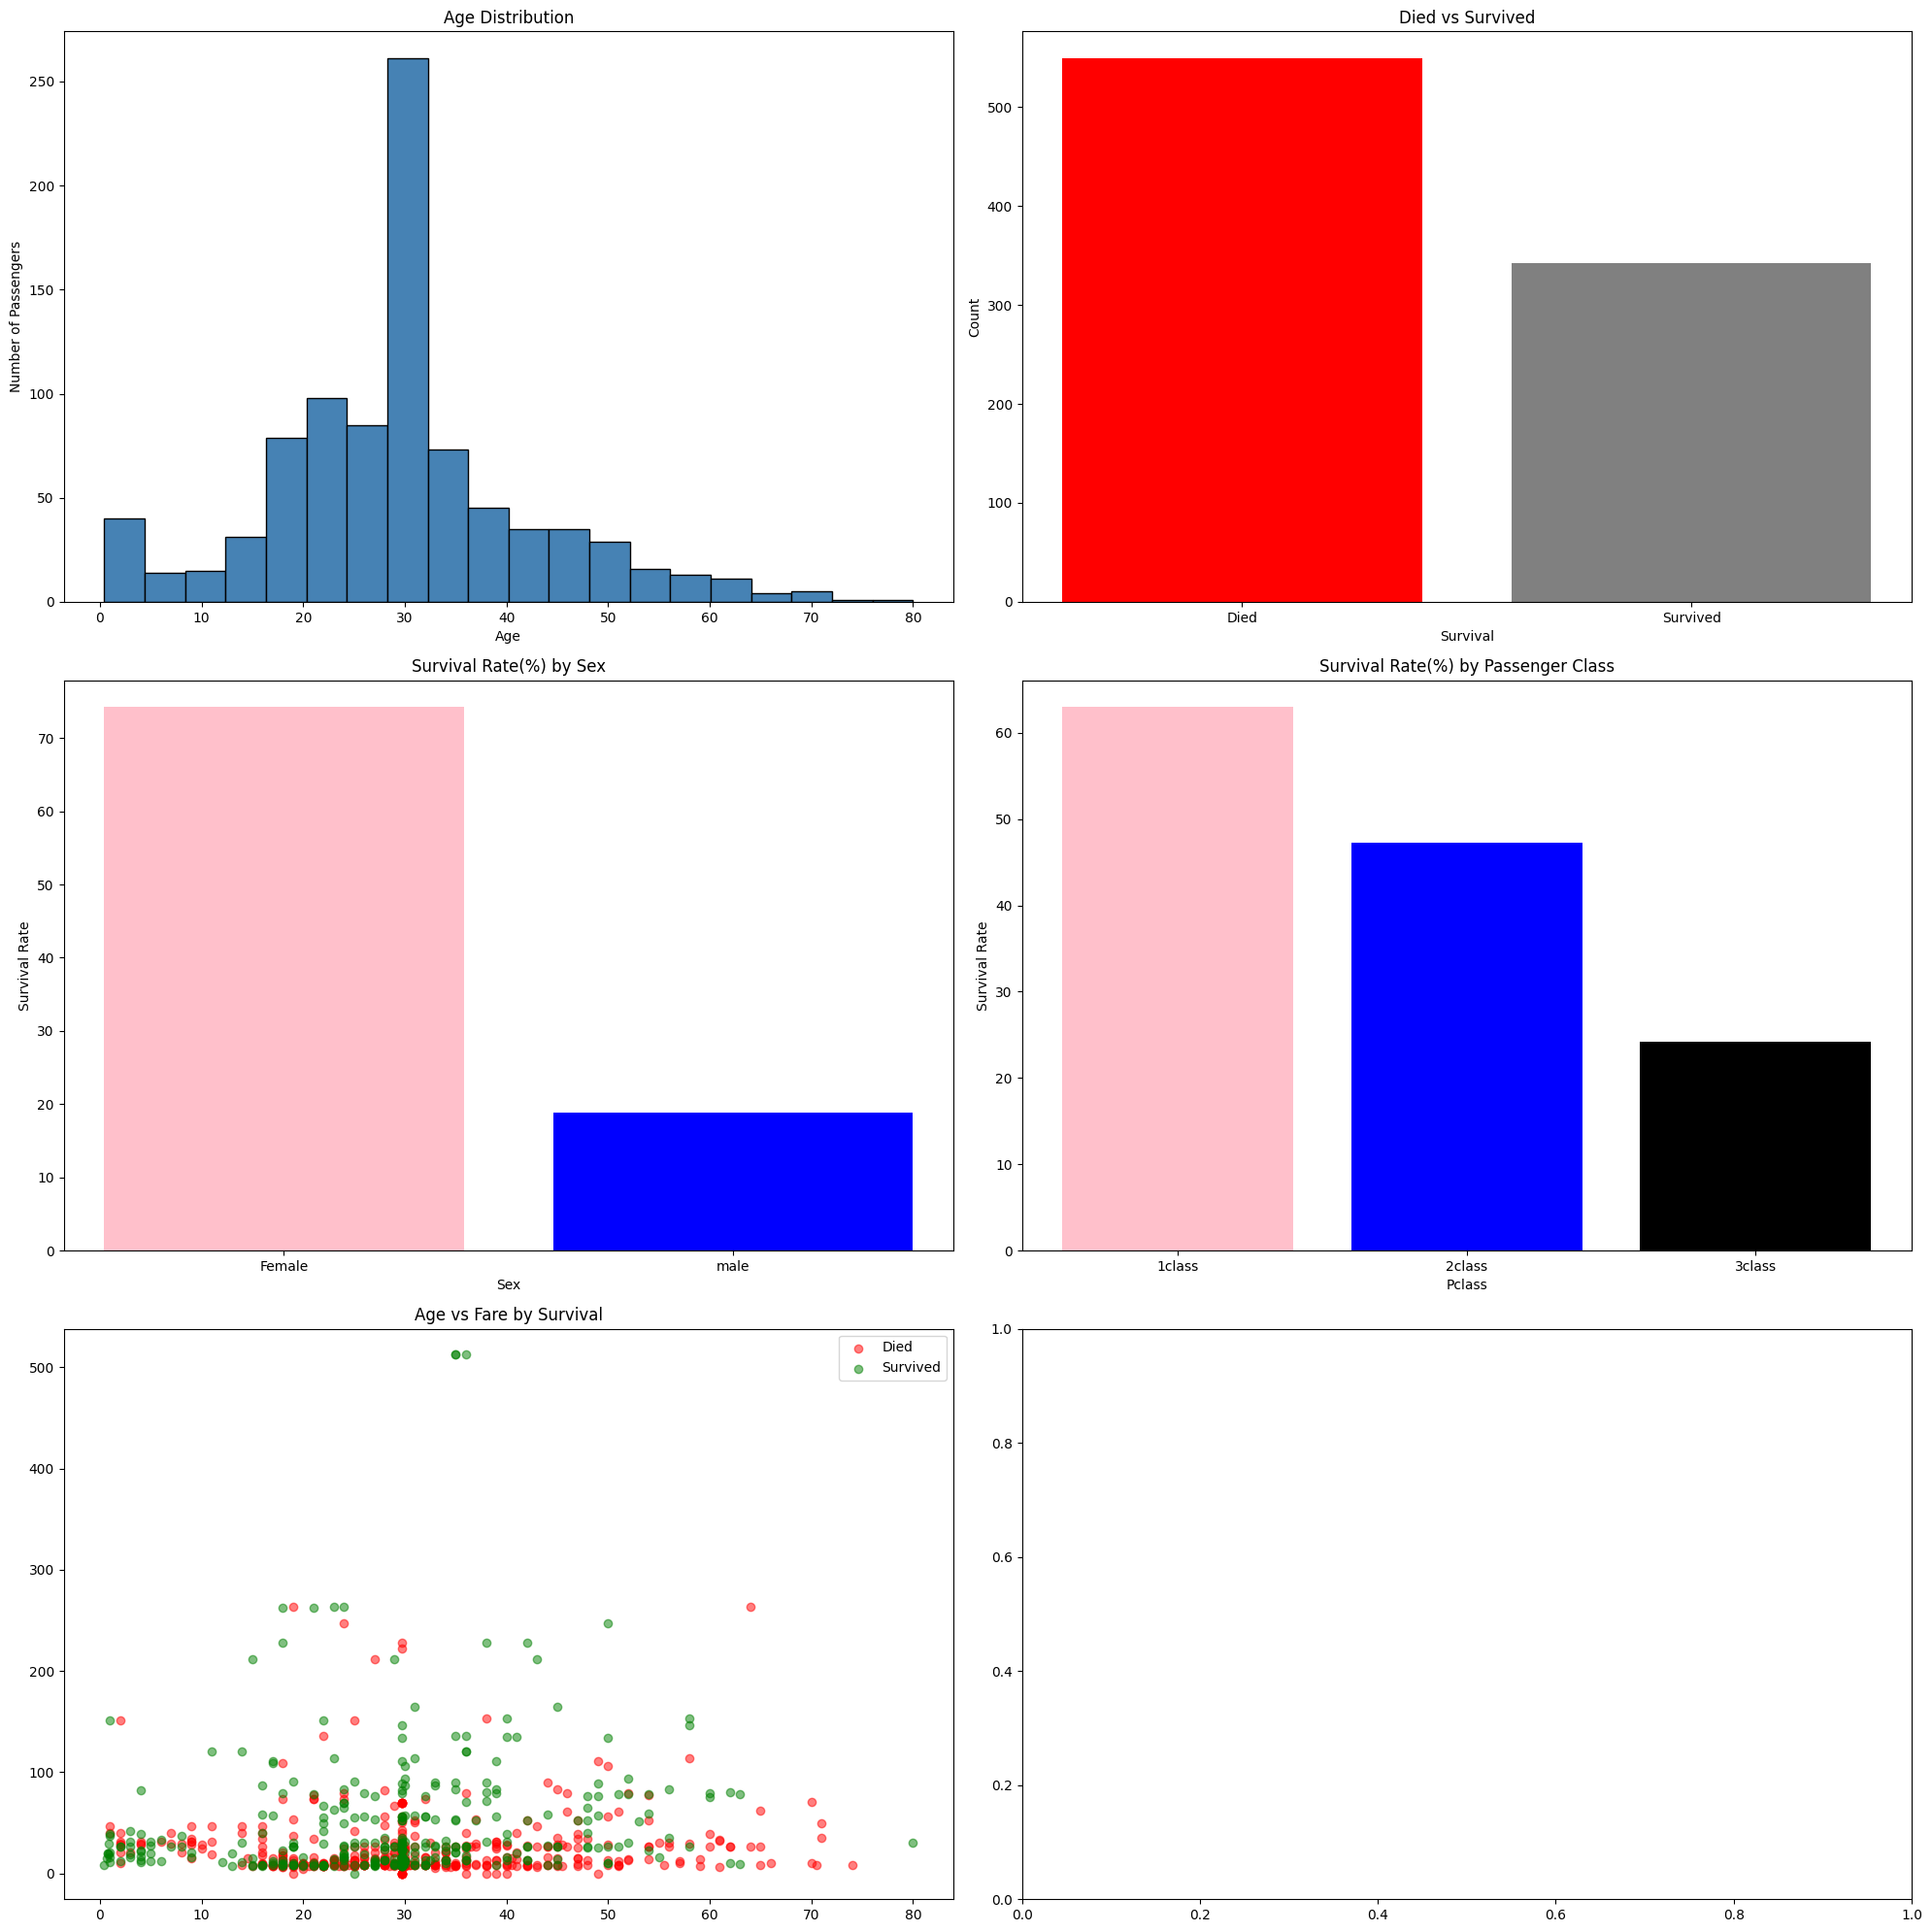

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
axes = axes.flatten()

axes[0].hist(df["Age"], bins=20, color="steelblue", edgecolor="black")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of Passengers")

axes[1].bar(["Died","Survived"], df["Survived"].value_counts(), color=["red","grey"])
axes[1].set_title("Died vs Survived")
axes[1].set_xlabel("Survival")
axes[1].set_ylabel("Count")

sex_survival = df.groupby("Sex")["Survived"].mean()*100
print(sex_survival)
axes[2].bar(["Female","male"], sex_survival, color=["pink","blue"]) #sex_survival.index, sex_survival.values,
axes[2].set_title("Survival Rate(%) by Sex")
axes[2].set_xlabel("Sex")
axes[2].set_ylabel("Survival Rate")

pclass_survival = df.groupby("Pclass")["Survived"].mean()*100
print(pclass_survival)
axes[3].bar(["1class","2class","3class"], pclass_survival, color=["pink","blue","black"])
axes[3].set_title("Survival Rate(%) by Passenger Class")
axes[3].set_xlabel("Pclass")
axes[3].set_ylabel("Survival Rate")

survivors = df[df["Survived"] == 1]
non_survivors = df[df["Survived"] == 0]

axes[4].scatter(non_survivors["Age"], non_survivors["Fare"], alpha=0.5, color="red", label="Died")
axes[4].scatter(survivors["Age"], survivors["Fare"], alpha=0.5, color="green", label="Survived")
axes[4].legend()
axes[4].set_title("Age vs Fare by Survival")

plt.tight_layout()    # prevents charts from overlapping
plt.show()


.flatten() method is used on an array of Axes objects (subplots) returned by plt.subplots() to convert the multi-dimensional array of axes into a single, one-dimensional array or list, which simplifies iterating over them.